# 模型思想

## 概念

- 白色：信息完全已知，完全可预测
- 灰色：部分信息已知，存在一定不确定性和模糊性
- 黑色：信息完全未知，无法预测

## 核心

- 计算变量之间的关联度

# 算法步骤

1. 正向化、统一量纲（均值化变换）
2. 计算差值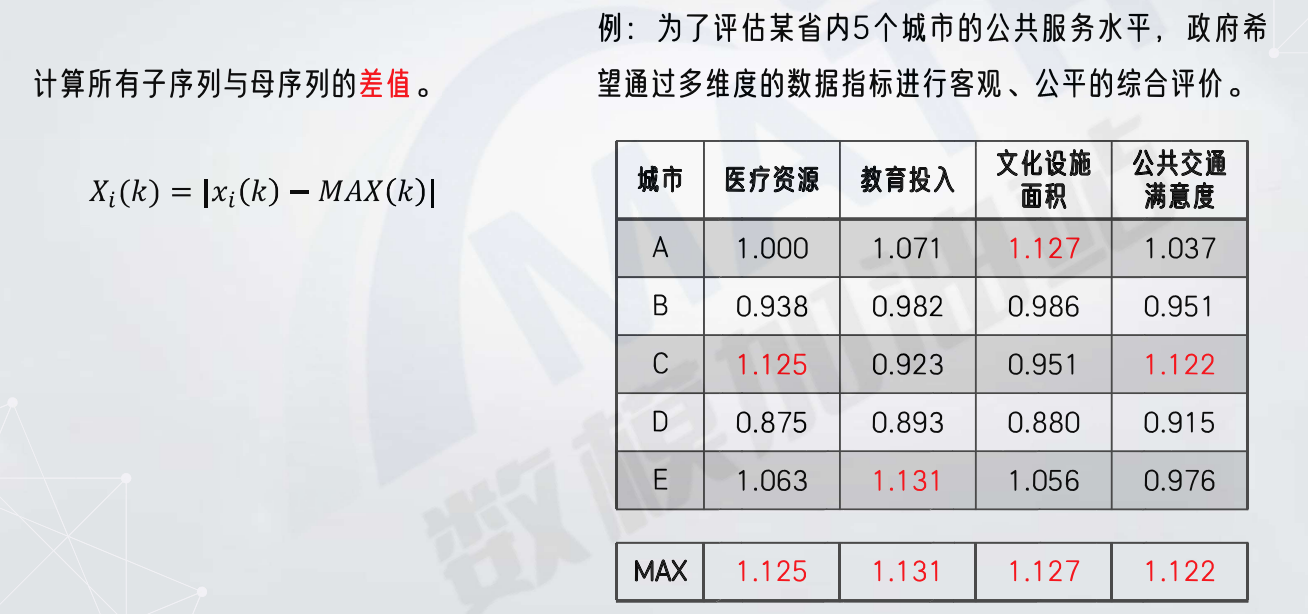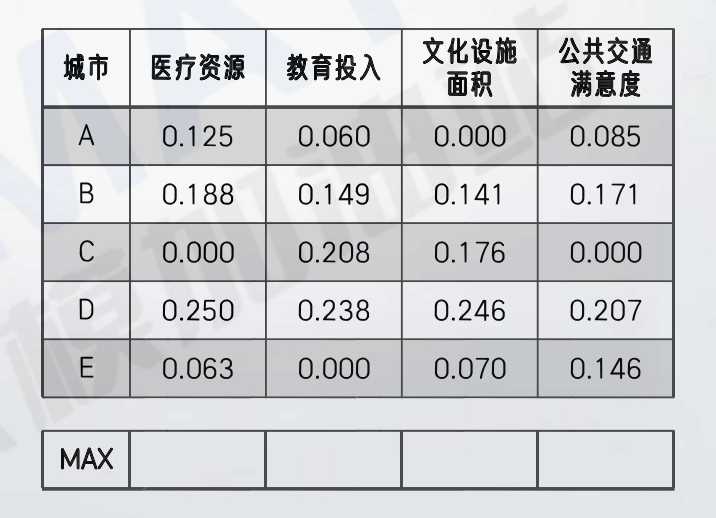
3. 求关联系数和关联度

# python代码

## 函数讲解

In [1]:
# 在python中，np.mean（）是用来计算平均值（算术平均数）的函数。
# 基础语法：np.mean(a, axis=None, keepdims=False)
# a：输入数组
# axis：指定沿哪个轴计算平均值，默认对所有元素求平均值（axis=0，对列求均值；axis=1，对行求均值）
# keepdims：是否保留原数组的维度（默认为 False，即不保留维度）
import numpy as np
a = np.array([[1, 2],
              [3, 4]])
print(np.mean(a))
print(np.mean(a, axis=0))
print(np.mean(a, axis=1))

2.5
[2. 3.]
[1.5 3.5]


## 算法代码

In [ ]:
import numpy as np  # 导入numpy库，用于进行科学计算

# 从用户输入中接收参评数目和指标数目，并将输入的字符串转换为数值
print("请输入参评数目：")
n = eval(input())  # 接收参评数目
print("请输入指标数目：")
m = eval(input())  # 接收指标数目

# 接收用户输入的类型矩阵，该矩阵指示了每个指标的类型（极大型、极小型等）
print("请输入类型矩阵：1:极大型，2：极小型，3：中间型，4：区间型")
kind = input().split(" ")  # 将输入的字符串按空格分割，形成列表
# 80 0.18 3.2 8.5
# 75 0.165 2.8 7.8
# 90 0.155 2.7 9.2
# 70 0.15 2.5 7.5
# 85 0.19 3 8

# 接收用户输入的矩阵并转换为numpy数组
print("请输入矩阵：")
A = np.zeros(shape=(n, m))  # 初始化一个n行m列的全零矩阵A
for i in range(n):
    A[i] = input().split(" ")  # 接收每行输入的数据
    A[i] = list(map(float, A[i]))  # 将接收到的字符串列表转换为浮点数列表
print("输入矩阵为：\n{}".format(A))  # 打印输入的矩阵A

# 极小型指标转化为极大型指标的函数
def minTomax(maxx, x):
    x = list(x)  # 将输入的指标数据转换为列表
    ans = [[(maxx-e)] for e in x]  # 计算最大值与每个指标值的差，并将其放入新列表中
    return np.array(ans)  # 将列表转换为numpy数组并返回

# 中间型指标转化为极大型指标的函数
def midTomax(bestx, x):
    x = list(x)  # 将输入的指标数据转换为列表
    h = [abs(e-bestx) for e in x]  # 计算每个指标值与最优值之间的绝对差
    M = max(h)  # 找到最大的差值
    if M == 0:
        M = 1  # 防止最大差值为0的情况
    ans = [[(1-e/M)] for e in h]  # 计算每个差值占最大差值的比例，并从1中减去，得到新指标值
    return np.array(ans)  # 返回处理后的numpy数组

# 区间型指标转化为极大型指标的函数
def regTomax(lowx, highx, x):
    x = list(x)  # 将输入的指标数据转换为列表
    M = max(lowx-min(x), max(x)-highx)  # 计算指标值超出区间的最大距离
    if M == 0:
        M = 1  # 防止最大距离为0的情况
    ans = []
    for i in range(len(x)):
        if x[i]<lowx:
            ans.append([(1-(lowx-x[i])/M)])  # 如果指标值小于下限，则计算其与下限的距离比例
        elif x[i]>highx:
            ans.append([(1-(x[i]-highx)/M)])  # 如果指标值大于上限，则计算其与上限的距离比例
        else:
            ans.append([1])  # 如果指标值在区间内，则直接取为1
    return np.array(ans)  # 返回处理后的numpy数组

# 统一指标类型，将所有指标转化为极大型指标
X = np.zeros(shape=(n, 1))
for i in range(m):
    if kind[i]=="1":  # 如果当前指标为极大型，则直接使用原值
        v = np.array(A[:, i])
    elif kind[i]=="2":  # 如果当前指标为极小型，调用minTomax函数转换
        maxA = max(A[:, i])
        v = minTomax(maxA, A[:, i])
    elif kind[i]=="3":  # 如果当前指标为中间型，调用midTomax函数转换
        print("类型三：请输入最优值：")
        bestA = eval(input())
        v = midTomax(bestA, A[:, i])
    elif kind[i]=="4":  # 如果当前指标为区间型，调用regTomax函数转换
        print("类型四：请输入区间[a, b]值a：")
        lowA = eval(input())
        print("类型四：请输入区间[a, b]值b：")
        highA = eval(input())
        v = regTomax(lowA, highA, A[:, i])
    if i==0:
        X = v.reshape(-1, 1)  # 如果是第一个指标，直接替换X数组
    else:
        X = np.hstack([X, v.reshape(-1, 1)])  # 如果不是第一个指标，则将新指标列拼接到X数组上
print("统一指标后矩阵为：\n{}".format(X))  # 打印处理后的矩阵X

# 对正向化后的矩阵进行预处理
Mean = np.mean(X, axis=0)
Z = X / Mean

print('预处理后的矩阵为：')
print(Z)

# 构造母序列和子序列
Y = np.max(Z, axis=0)  # 母序列为虚拟的，用每一列的最大值构成的行向量表示母序列
X = Z  # 子序列就是预处理后的数据矩阵

# 计算得分
absX0_Xi = np.abs(X - np.tile(Y.reshape(1, -1), (X.shape[0], 1)))
a = np.min(absX0_Xi)
b = np.max(absX0_Xi)
rho = 0.5  # 分辨系数取0.5
gamma = (a + rho * b) / (absX0_Xi + rho * b)  # 计算子序列中各个指标与母序列的关联系数

score = np.mean(gamma, axis=1)   # 计算关联度

print('最终关联度为：')
print(score)